Importing all the libraries that we will need for machine learning

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage import data, color, img_as_float, img_as_ubyte, filters, feature
from skimage import draw as drw
import matplotlib.ticker as plticker
from PIL import Image, ImageDraw
import matplotlib.patches as patches
import csv
import math
%matplotlib inline
from IPython.display import HTML, display
import numpy as np
from sklearn import preprocessing, cross_validation, neighbors
import pandas as pd
from pandas import DataFrame
import csv
from skimage import data, color, img_as_float, img_as_ubyte, filters, feature
import matplotlib.pyplot as plt
from numpy import genfromtxt
from sklearn import preprocessing
import timeit
from skimage import data, color, img_as_float, img_as_ubyte, filters, feature
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import ImageFilter
from scipy import ndimage, misc

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Load Retina Image

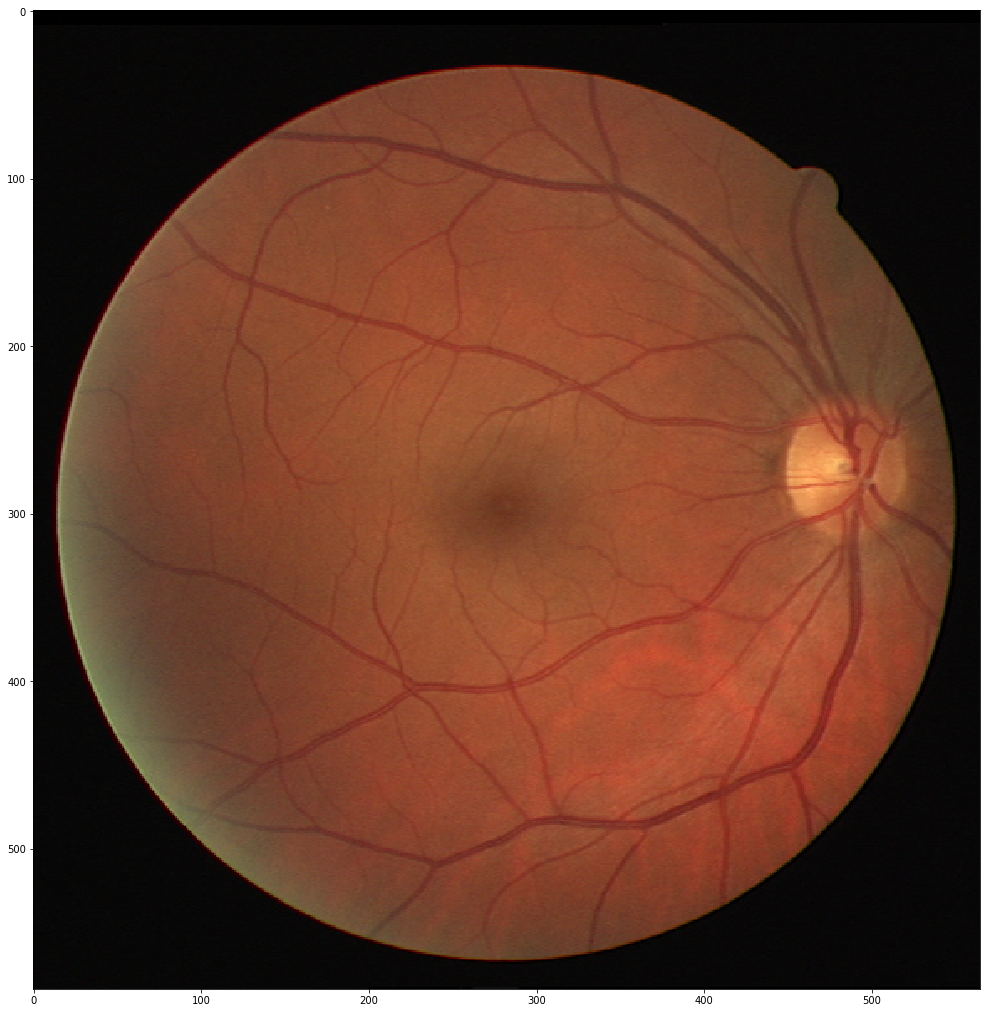

In [2]:
my_image = '19_test.tif' 

# Load and Display Retina Image 
plt.figure(figsize=(20,18))
img=mpimg.imread(my_image)
imgplot = plt.imshow(img)
plt.show()

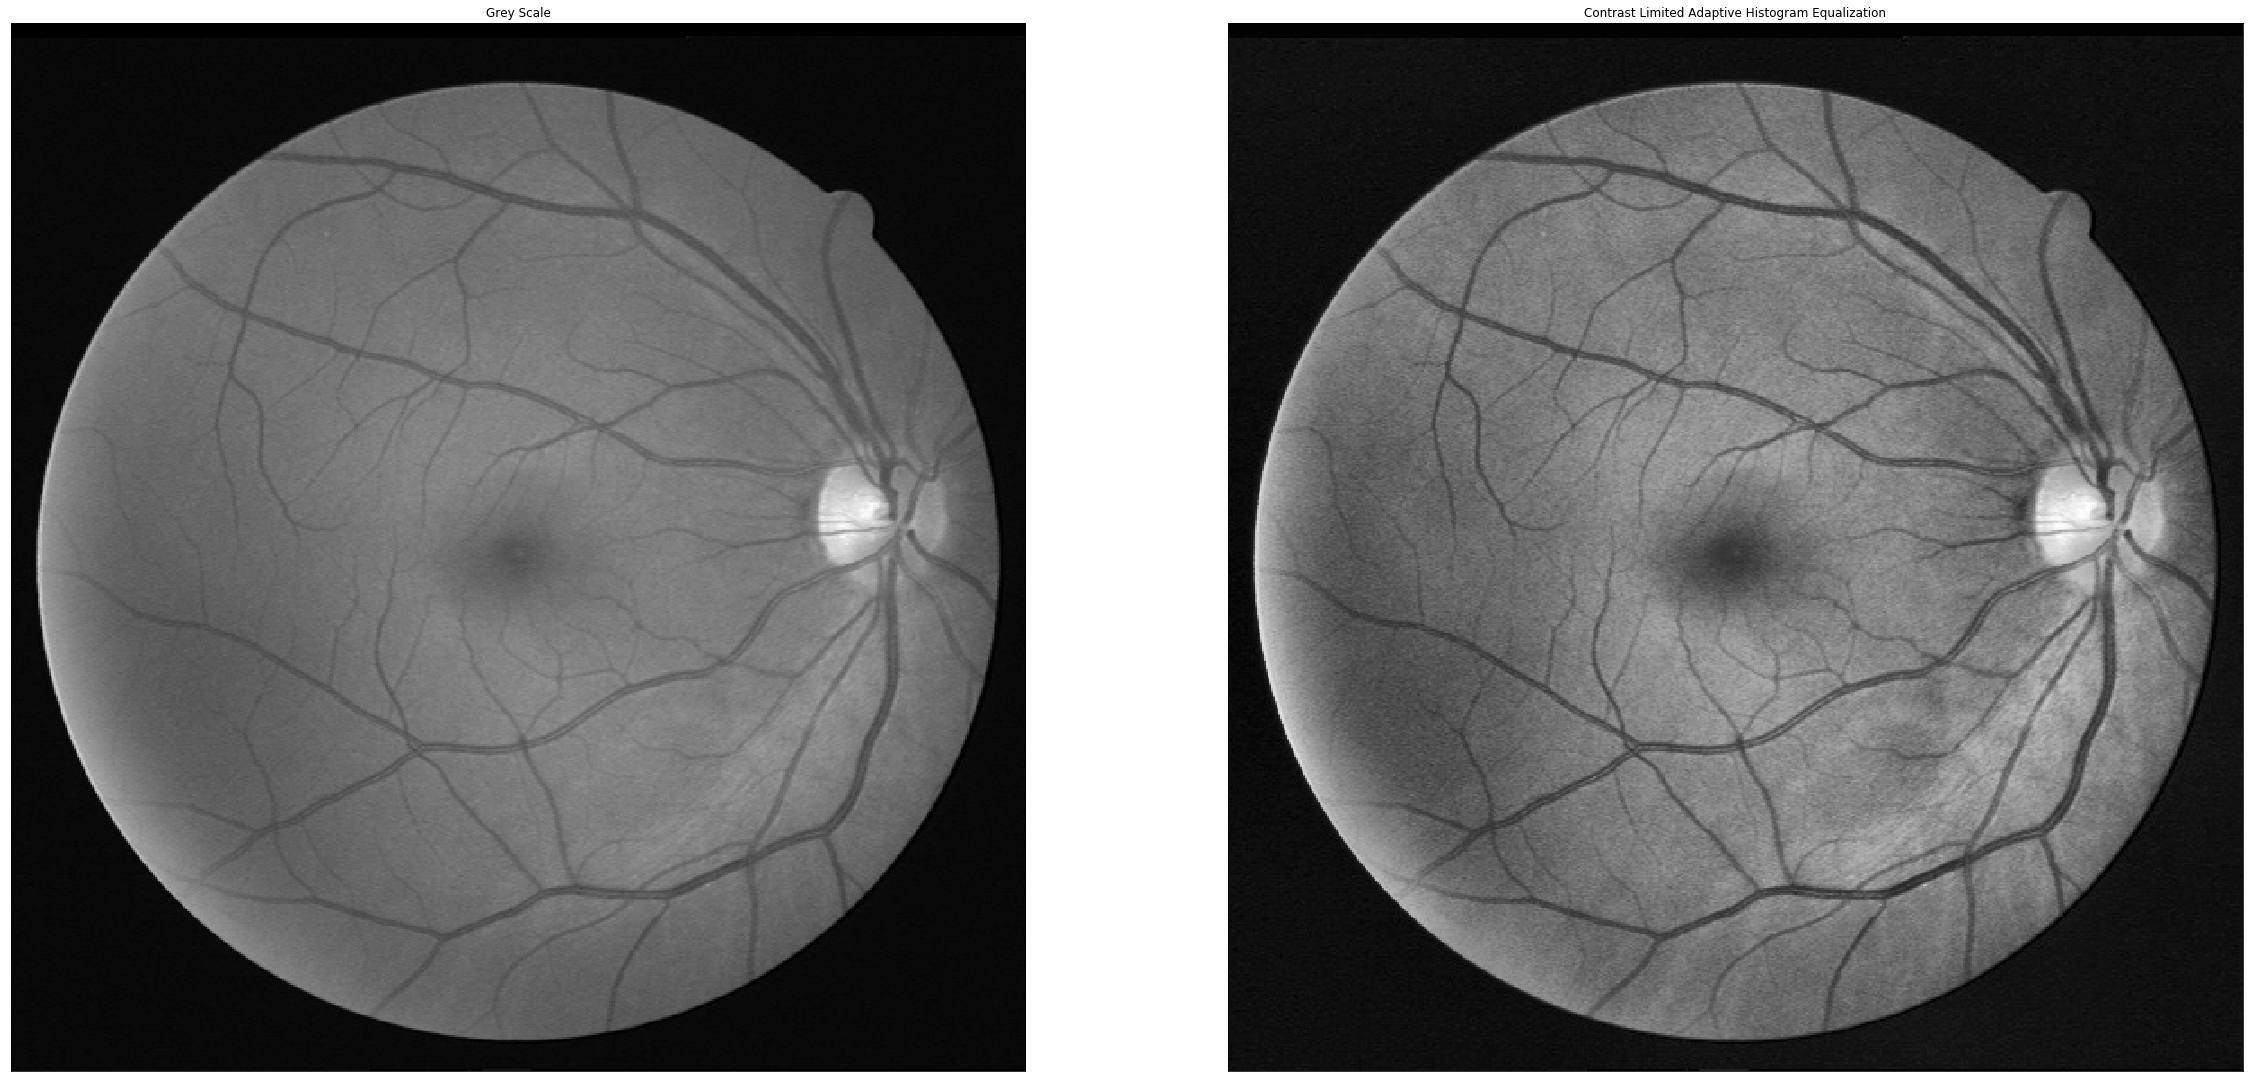

In [3]:
# importing image for testing
retina_image =  my_image 

# Converting image into grey scale 
retina = data.imread(retina_image)
retina_grey = color.rgb2grey(retina)

image = cv2.imread(my_image,0)

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(image)
##########################################################

plt.figure(figsize=(40,38))
plt.subplot(121),plt.imshow(retina_grey,cmap="gray"),plt.title('Grey Scale')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cl1,cmap="gray"),plt.title('Contrast Limited Adaptive Histogram Equalization')
plt.xticks([]), plt.yticks([])
plt.show()


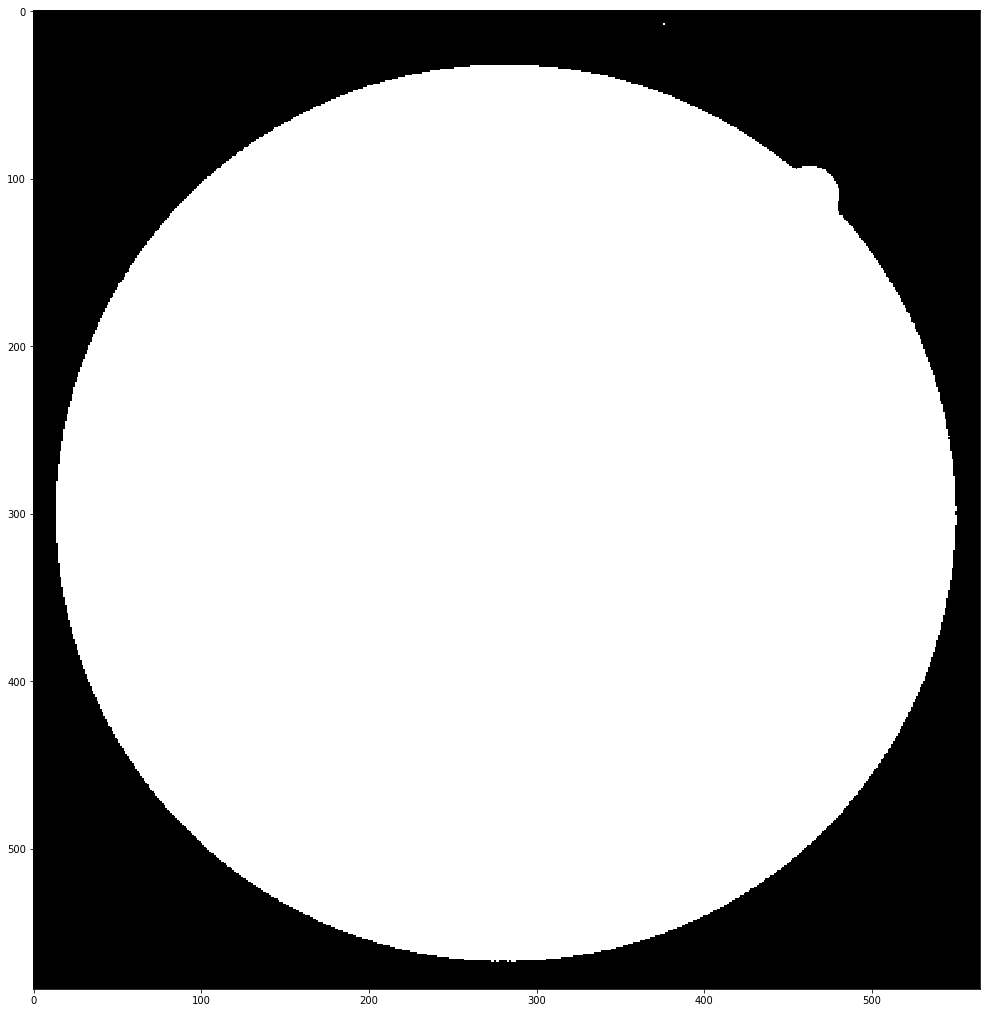

In [4]:
#Convert image to binary image, based on threshold im2bw, Use imbinarize instead.
thresh = 30
im_bw2 = cv2.threshold(cl1, thresh, 255, cv2.THRESH_BINARY)[1]
plt.figure(figsize=(20,18))
plt.imshow(im_bw2,cmap="gray")

In [5]:
print(im_bw2)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


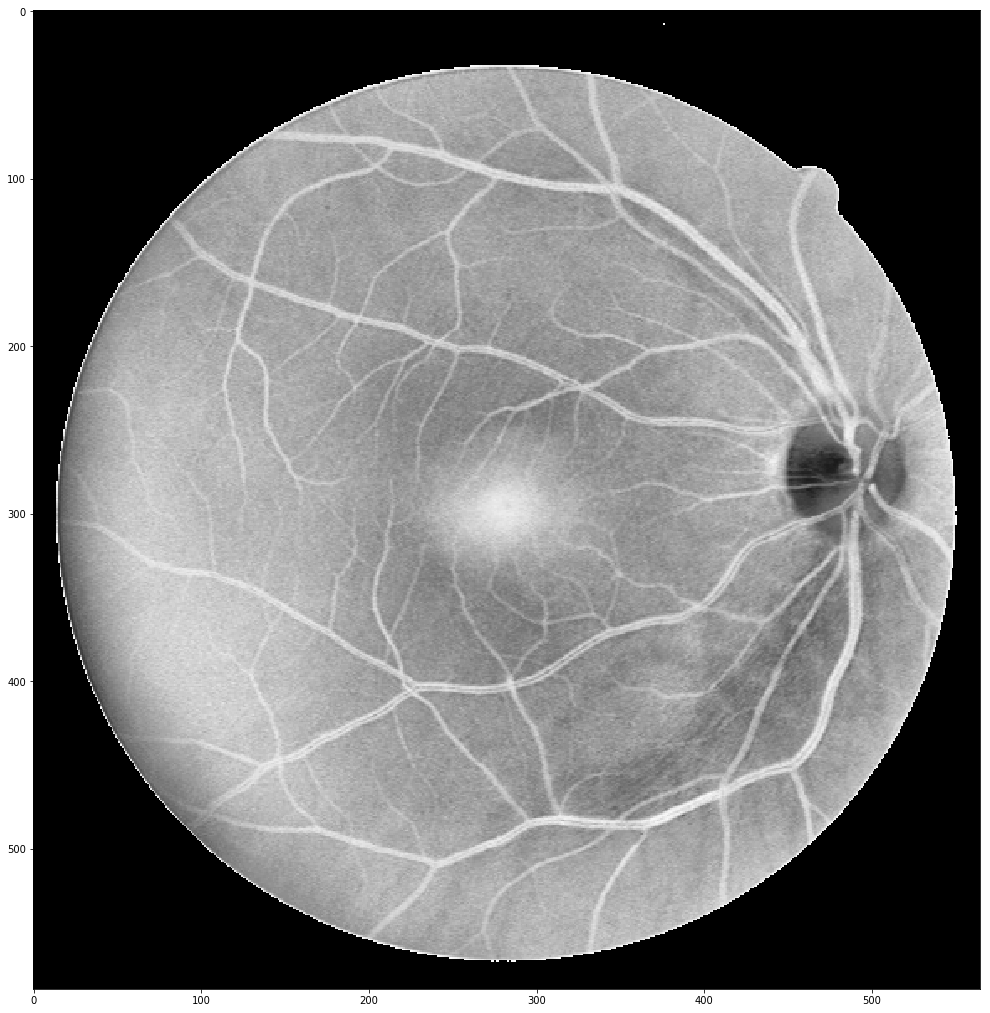

In [6]:
#apply the mask 
plt.figure(figsize=(20,18))
image_mask = cl1*im_bw2
plt.imshow(image_mask,cmap="gray")

                       CLAHE (Contrast Limited Adaptive Histogram Equalization)

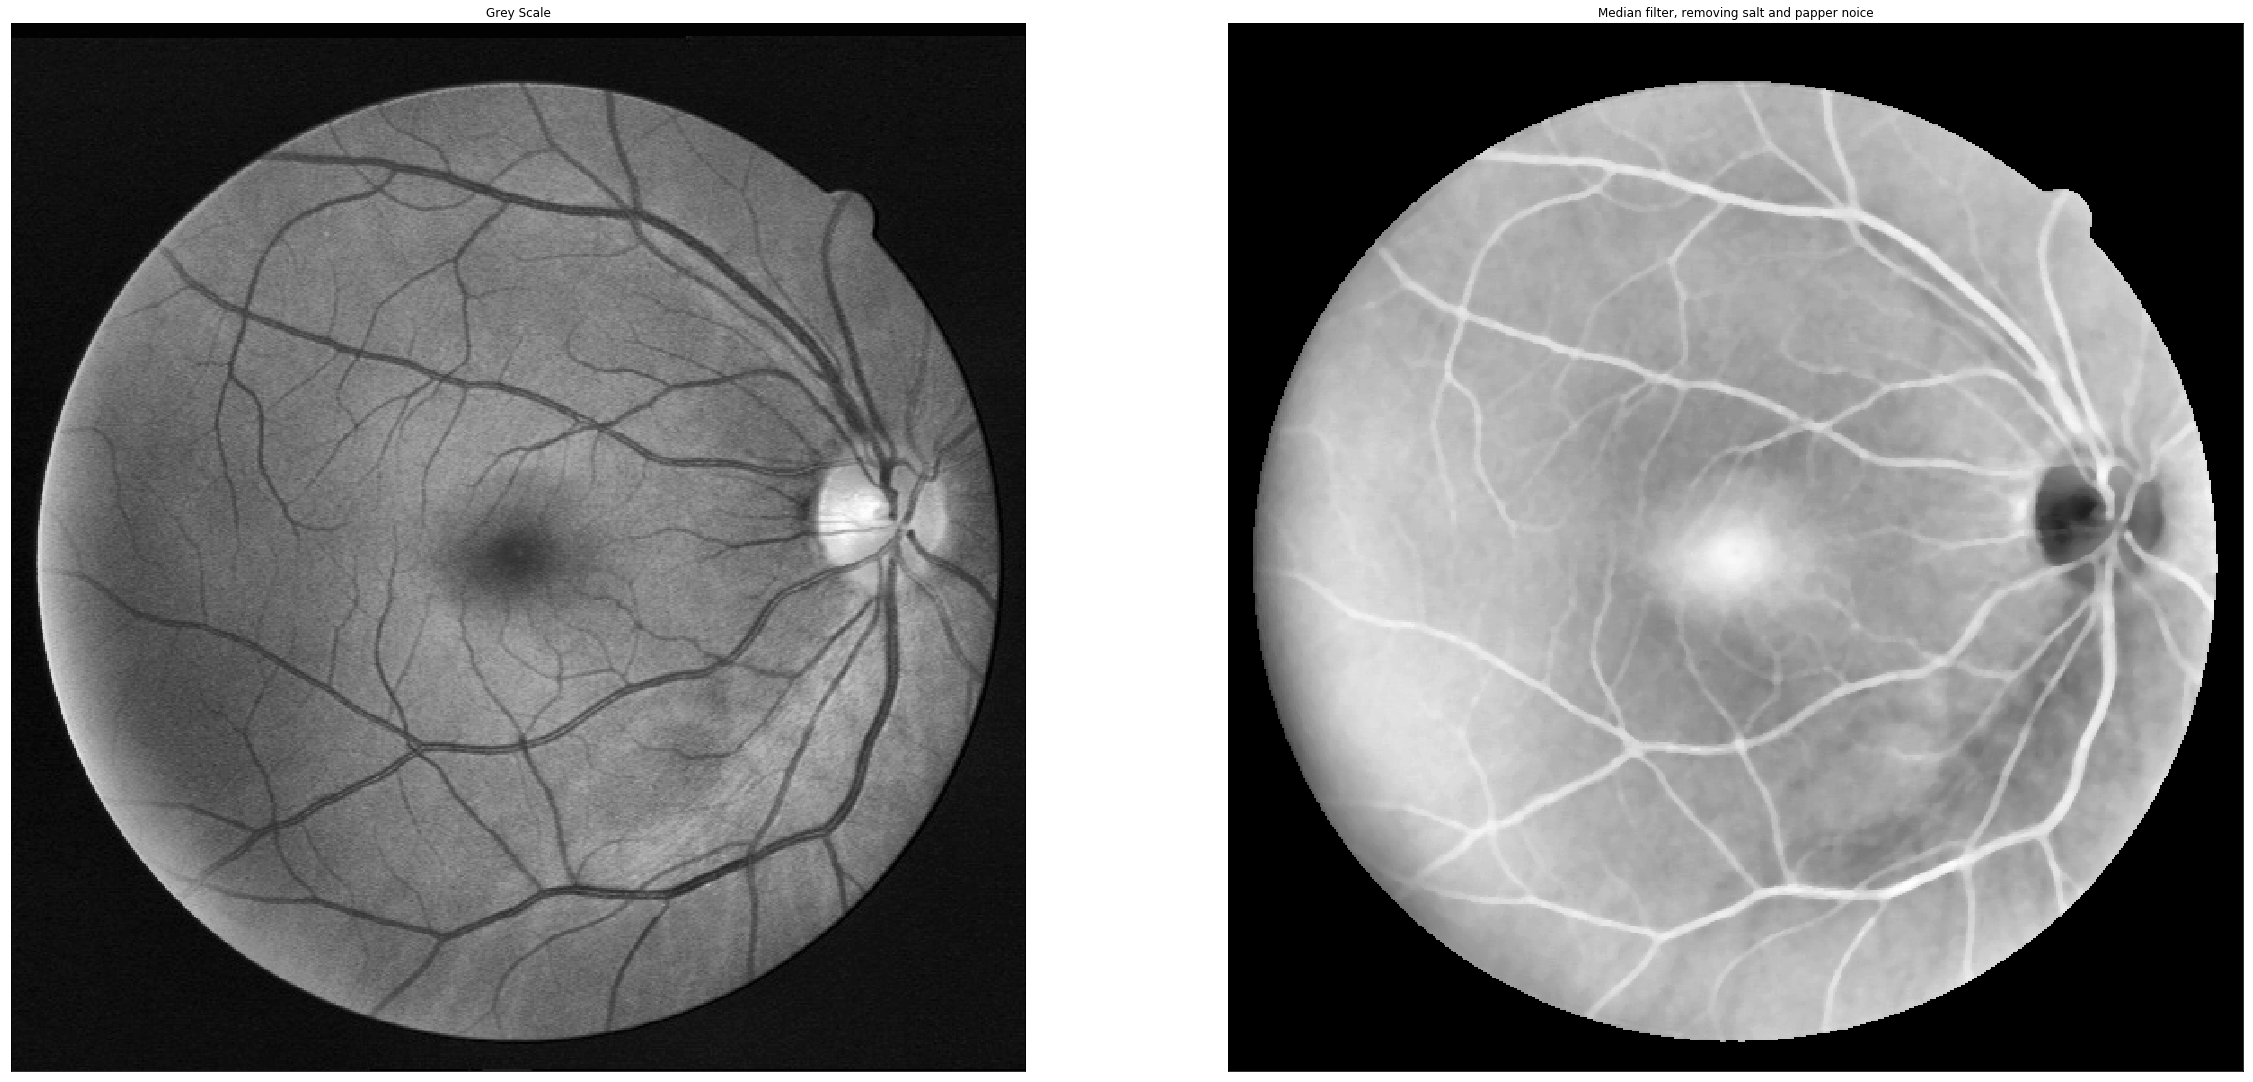

In [7]:
# B = medfilt2(A,[m n]) performs median filtering, where each output pixel contains the median value in the m-by-n 
#neighborhood around the corresponding pixel in the input image.
median = cv2.medianBlur(image_mask,5)


plt.figure(figsize=(40,38))
plt.subplot(121),plt.imshow(cl1,cmap="gray"),plt.title('Grey Scale')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median,cmap="gray"),plt.title('Median filter, removing salt and papper noice')
plt.xticks([]), plt.yticks([])
plt.show()

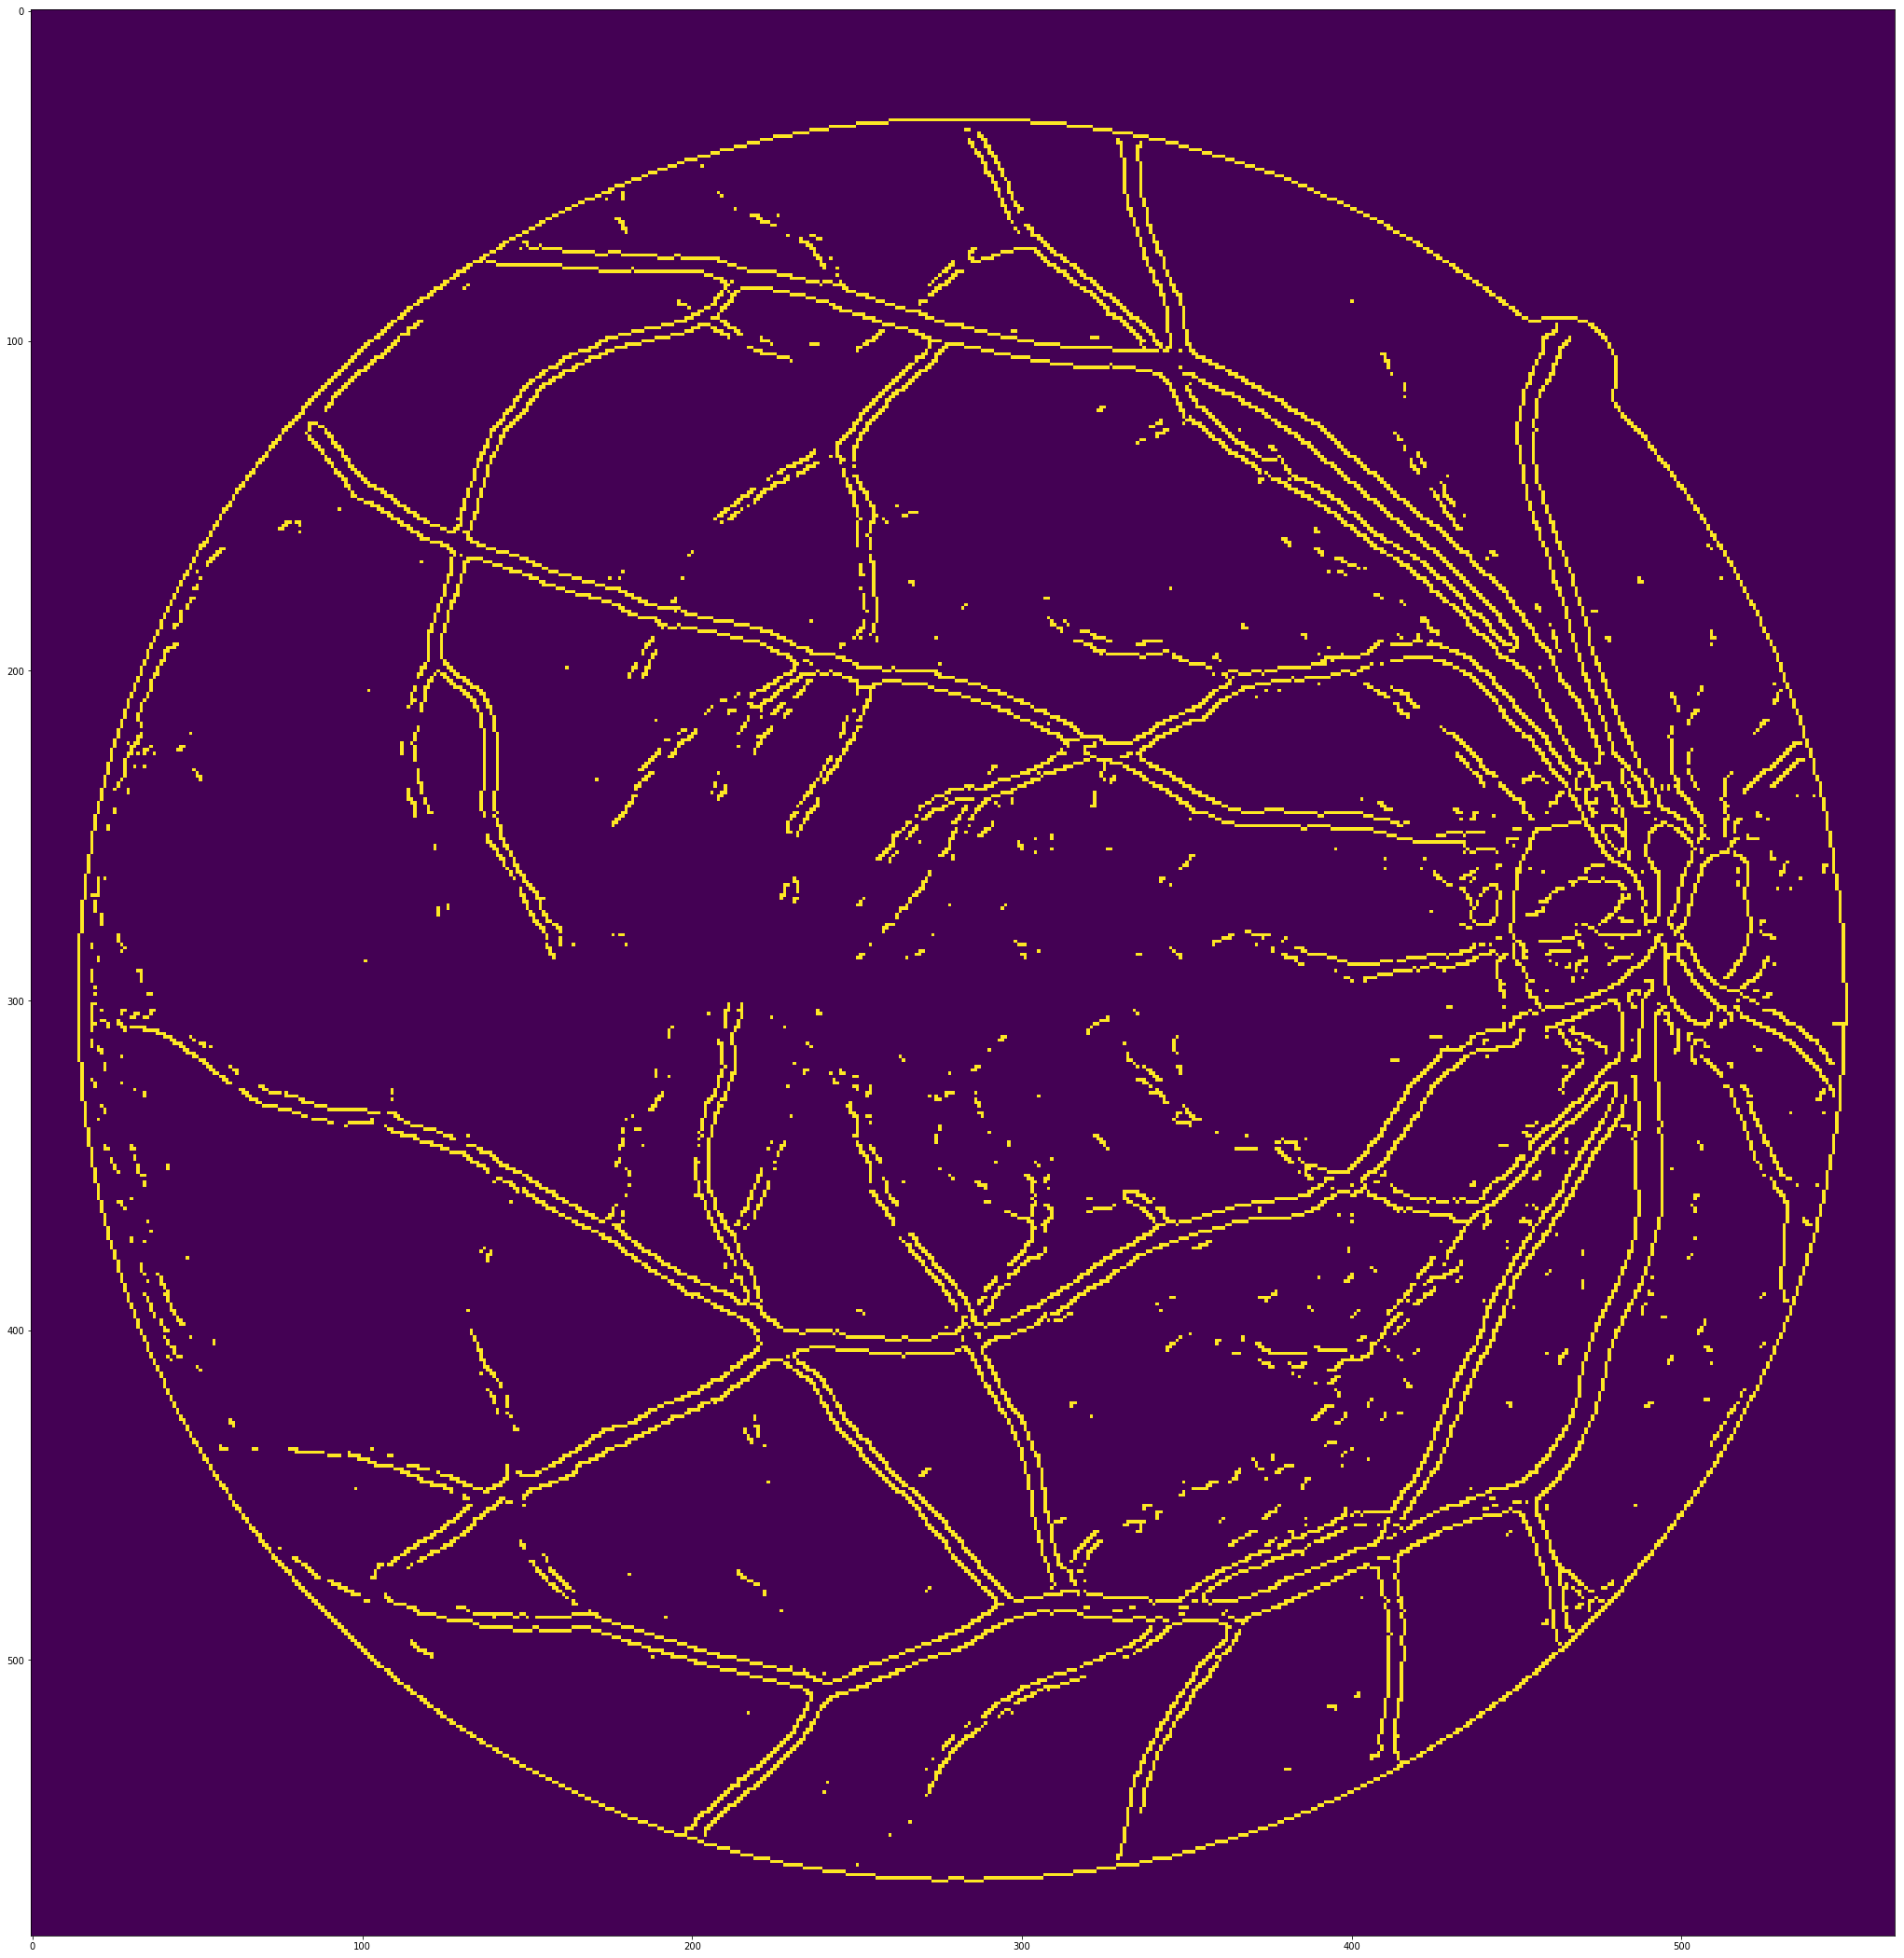

In [8]:
plt.figure(figsize=(40,38))
edges = cv2.Canny(median,50,50)
plt.imshow(edges)

2. Dilation
It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won’t come back, but our object area increases. It is also useful in joining broken parts of an object.

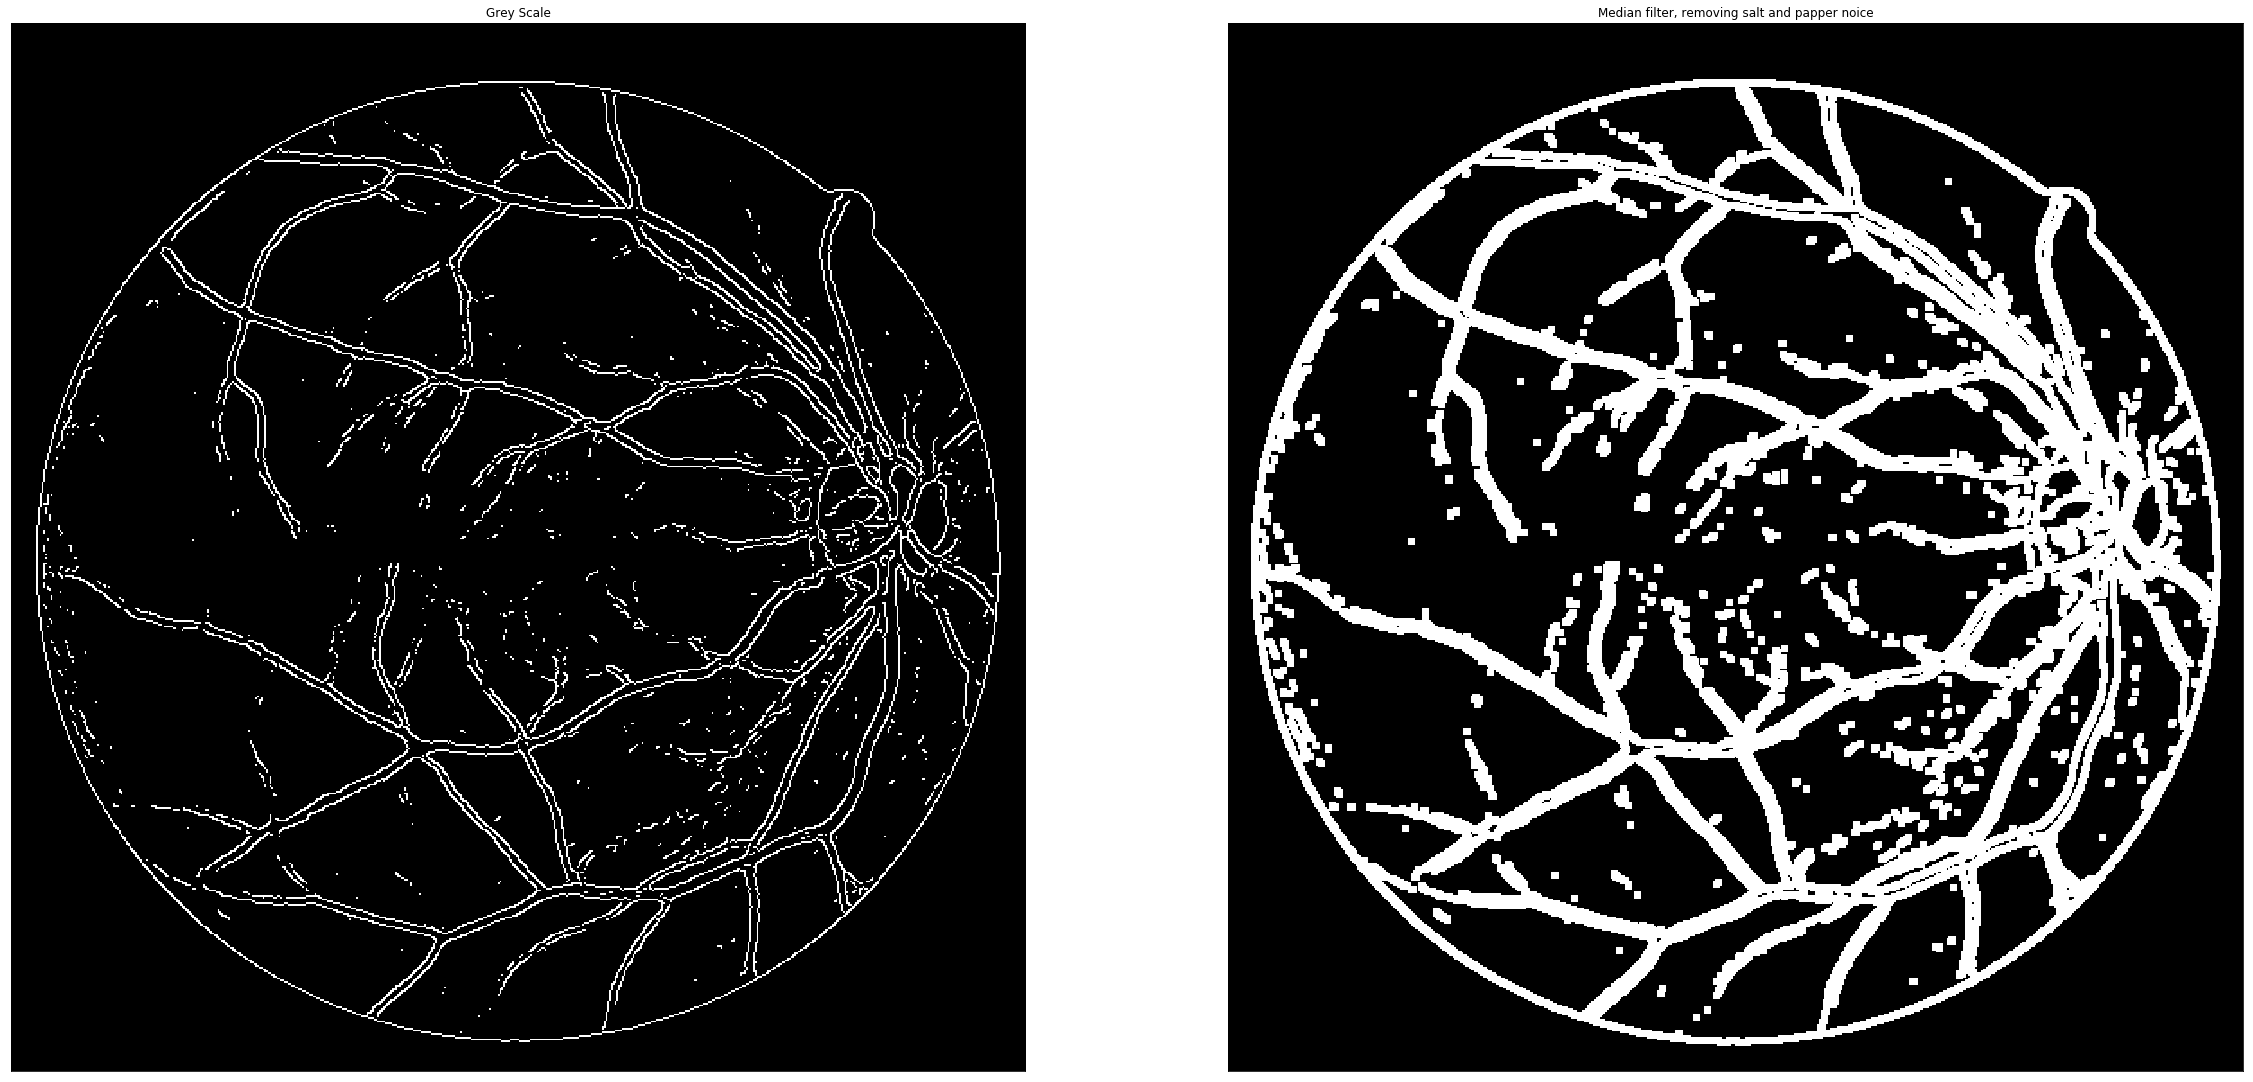

In [9]:
#dilation = cv2.dilate(edges,kernel,iterations = 3)
img_dilation = cv2.dilate(edges, np.ones((4, 4)))

plt.figure(figsize=(40,38))
plt.subplot(121),plt.imshow(edges,cmap="gray"),plt.title('Grey Scale')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_dilation,cmap="gray"),plt.title('Median filter, removing salt and papper noice')
plt.xticks([]), plt.yticks([])
plt.show()

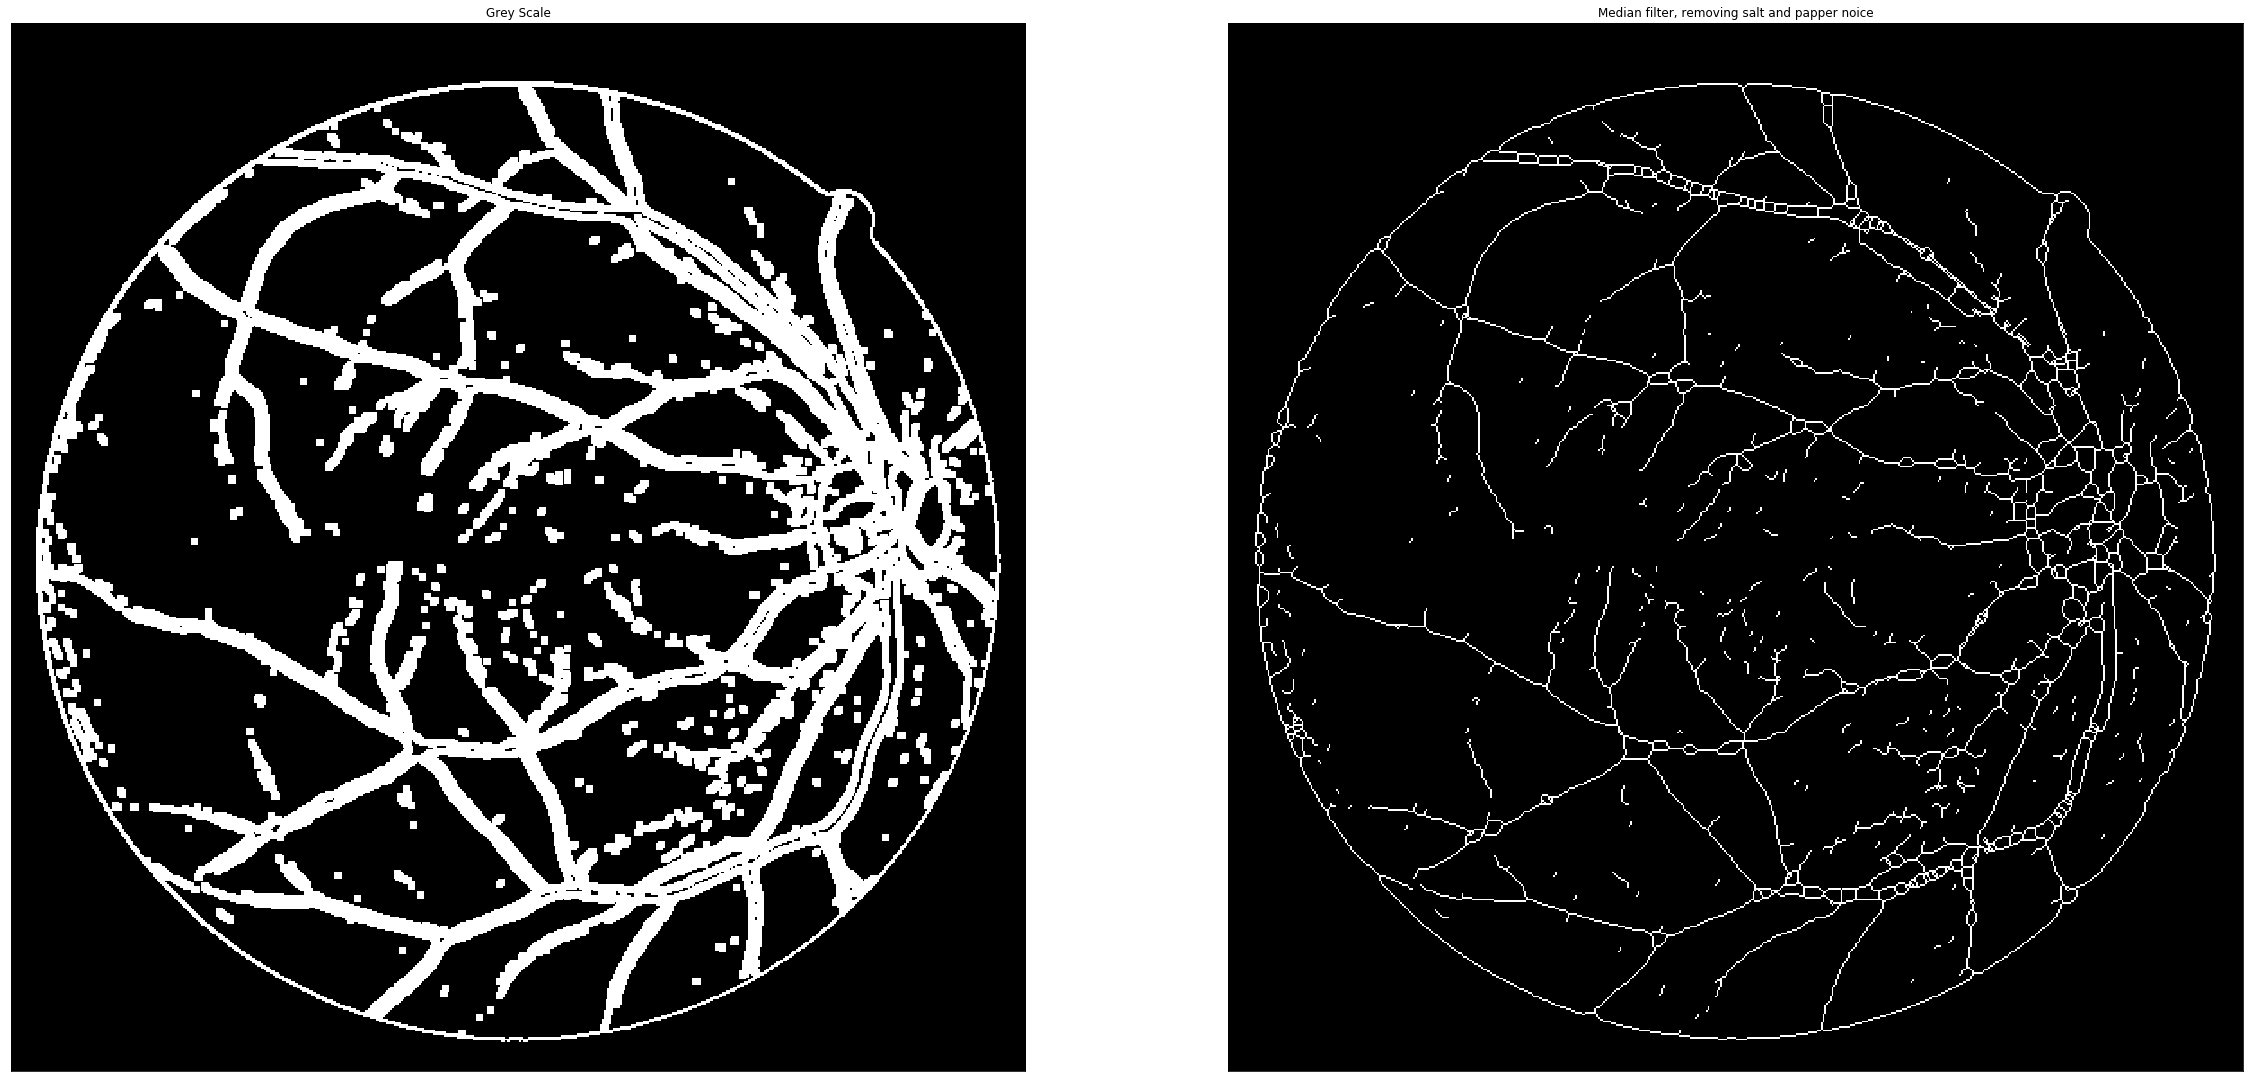

In [10]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the image
image = img_dilation*im_bw2

# perform skeletonization
skeleton = skeletonize(image)

# display results

plt.figure(figsize=(40,38))
plt.subplot(121),plt.imshow(image,cmap="gray"),plt.title('Grey Scale')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(skeleton,cmap="gray"),plt.title('Median filter, removing salt and papper noice')
plt.xticks([]), plt.yticks([])
plt.show()